# Wine Quality Prediction

#####  In this dataset we have to predict the quality of wine with the features which is provided. The features are responsible for prediction  the quality  of wine. We have to use the learning models, to predict the quality fo the wine. We will use classificaton technique to check the quality of the wine i.e. its good or bad.

In [78]:
# importing the required libraries


import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error


import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [79]:
data = pd.read_csv(r'C:\Users\tusha\Downloads\winequality-red.csv')
data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [80]:
# the dataset is about the wine quality.  which has different features based on that we have to predict the quality of the wine.
# quality is label and rest all these are the features such as fixed acidity, volatile acidity, chlorides etc.
# based on all these the quality of the wines changes.

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [82]:
# it can be seen that there is no null values in the dataset
# this dataset  quality has integer type datatypes and other all have float type data types.

In [83]:
data.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [84]:
# .describe() is used to check some stats.
# didn't see any missing values
# 25% is 1st quantile, 50% is 2nd quantile and 75% is 3rd quantile.
# mean and 2nd quantile (median) are approximately same.
# standard deviation.

# describe will only show the continous data. it will not show the categorical data.

####  We can see there is no missing data in the columns. Great !!

In [85]:
# Describe method doesn't show categorical stats, we use isna() to check nulls
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [86]:
# .isna() is used to check the categorical data.
#  if any categories is missing it will be seen in this method.

####  now plotting bar plot to see how data columns are distributed.

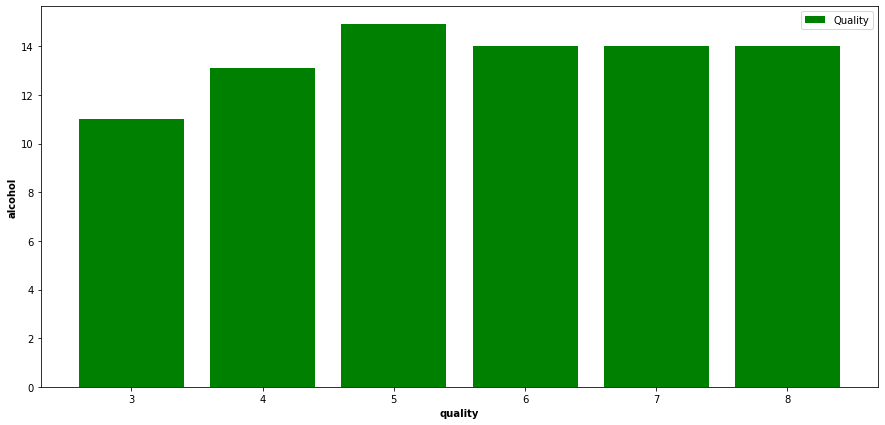

In [87]:
plt.figure(figsize=[15,7])
plt.bar(data['quality'],data['alcohol'],color='green',align='center')
plt.xlabel('quality',fontweight ='bold')
plt.ylabel('alcohol',fontweight='bold')
plt.legend(labels=['Quality'])
plt.show()

In [88]:
# by above plot we can observe that quality of wine increases with increase in alcohol quantity.

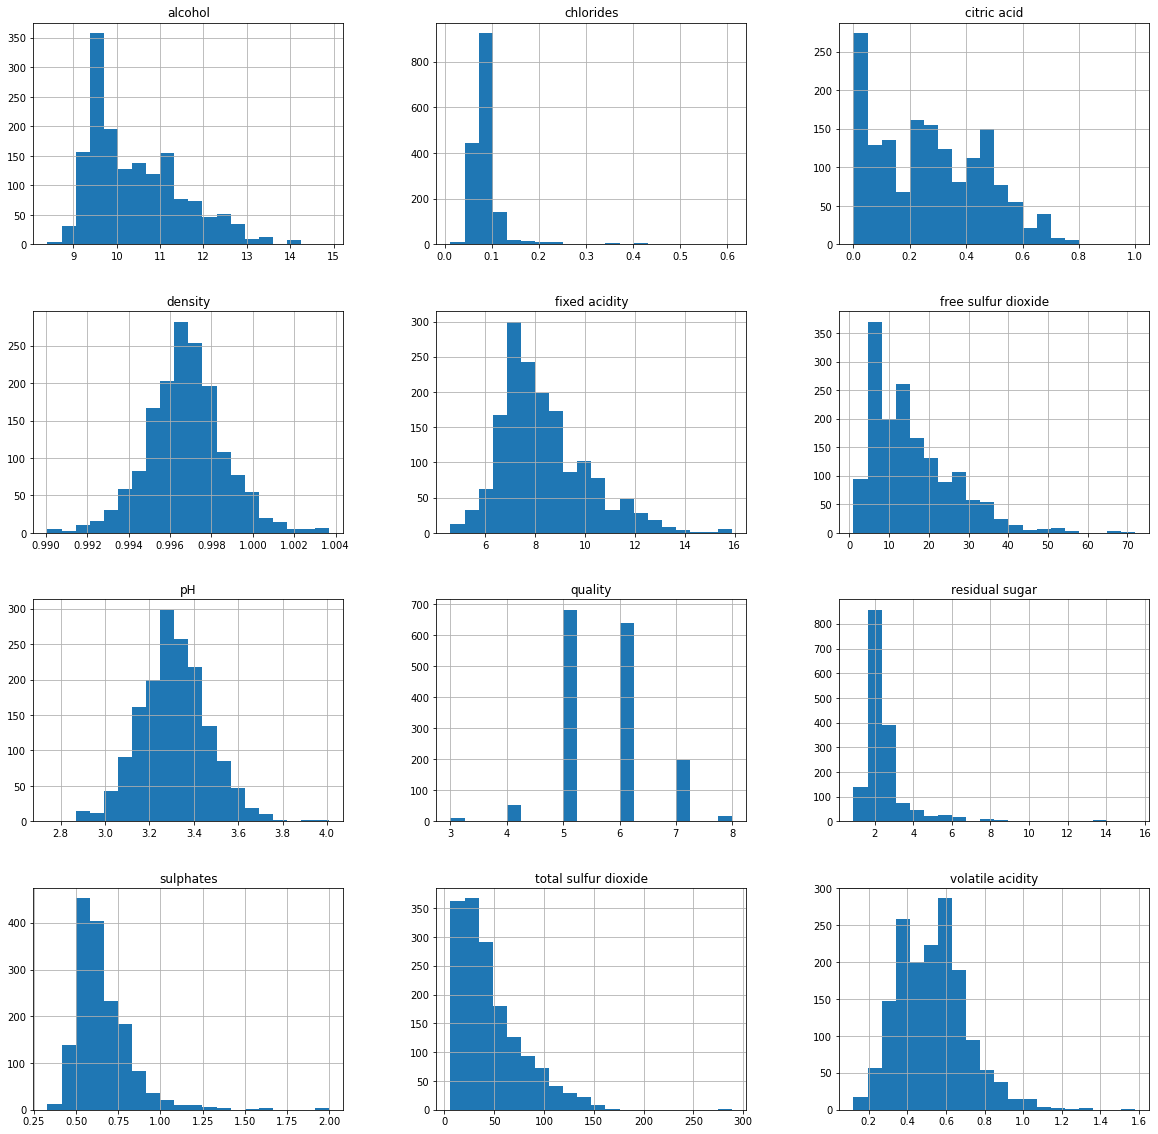

In [89]:
data.hist(bins=20,figsize=(20,20),layout=(4,3))
# bins   no. of histogram bins to be used in the histogram.
# figsize   indicates the size of histogram.
#  layout   will set the now of rows and columns of layout of histogram
plt.show()

In [90]:
# As we can see the distribution of data with respect to features.

## Plotting Heatmap (Correlation matrix)
* Let's try to see if we can reduce the features using different techniques
* Let's plot heatmap to visualize and find the coefficient of multicollinearity

In [91]:
# now we check if there is any multicollinearity or the relation how they are related one feature vs another and correlation feature vs label

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

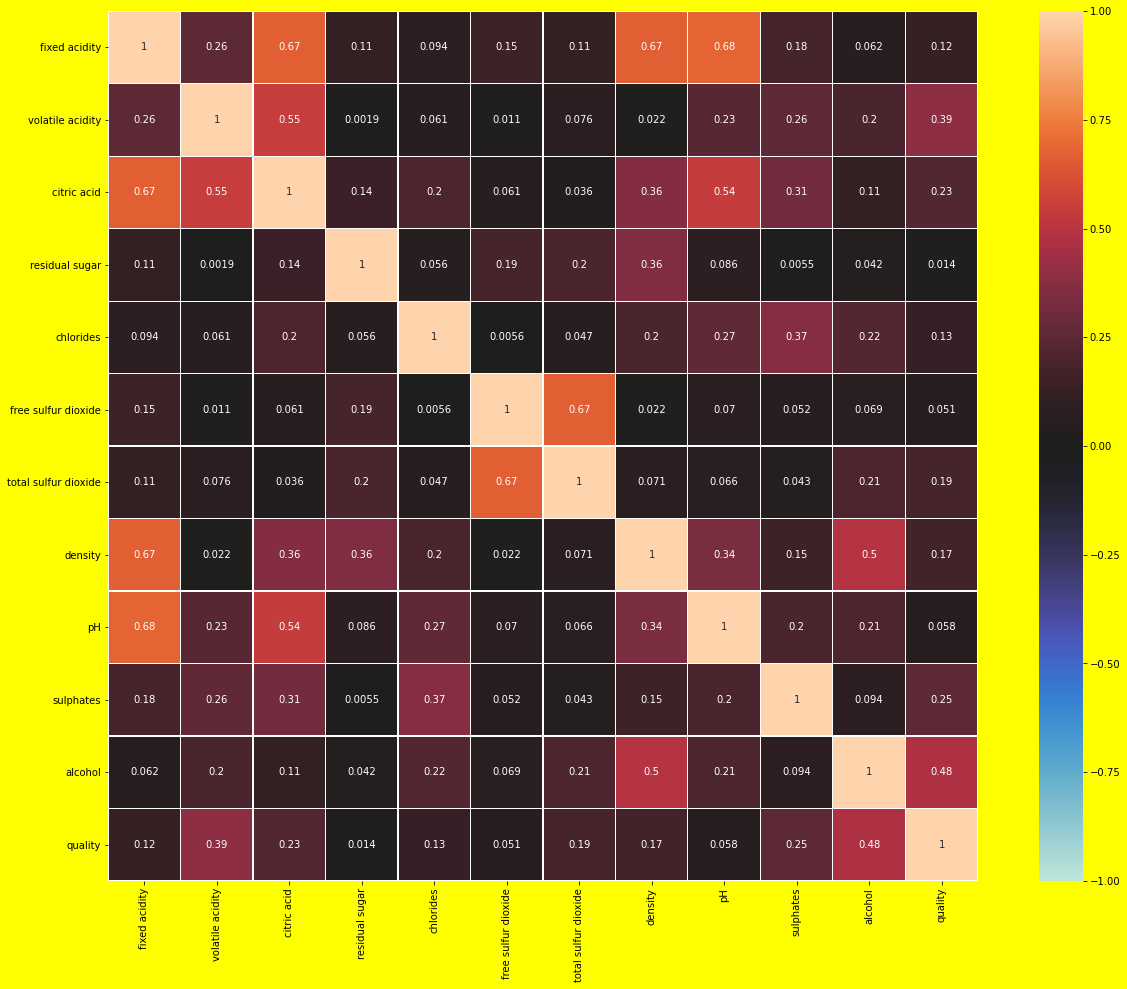

In [92]:
df_corr = data.corr().abs()

# .corr().abs    will get the numbers that will be stored in   df_corr()


plt.figure(figsize=(22,16),facecolor='yellow')
# it show the size of the heatmap figure

sns.heatmap(df_corr, vmin=-1, vmax=1, annot=True, square=True, center=0, fmt='.2g',linewidth=0.1)
# above all are visualisation technique
# vmin=-1 means that it will starts from -1 and goes upto vmax = +1 
#annot=True  will take the data and put into the heatmap boxes
#square=True boxes will be square.
# fmt='.2g' is formating i.e. digits after the decimal.
# linewiddth=0.1 it will make the gaps between the square boxes.

plt.tight_layout

In [93]:
# from heatmap we can observe that how citric acid is correlated with quality, alcohol, sulphate etc.
# above we have compared columns vs columns or features vs features.

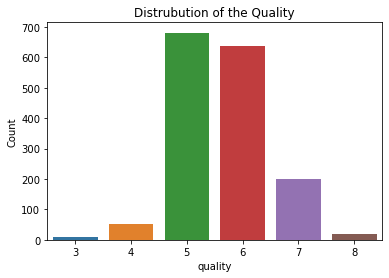

In [94]:
sns.countplot(data['quality'])
plt.title('Distrubution of the Quality')
plt.ylabel ('Count')
plt.show()

In [95]:
# from histogram we can see that the average quality lies from 5-7.

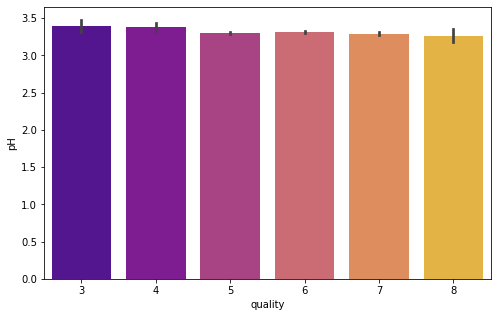

In [96]:
plt.figure(figsize=(8,5))
sns.barplot(data['quality'],data['pH'],palette='plasma')
plt.show()

In [97]:
# from above plot it can be seen that the pH of wine decreases with increase in quality of the wine.

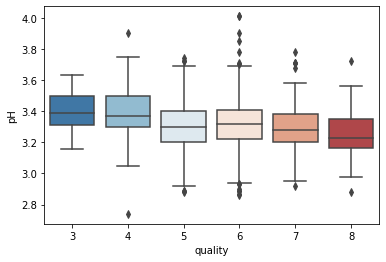

In [98]:
sns.boxplot(x='quality', y='pH', data=data, palette='RdBu_r')

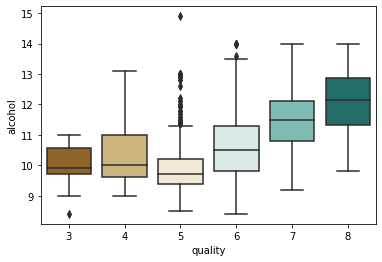

In [99]:
sns.boxplot(x='quality', y='alcohol', data=data, palette='BrBG')

In [100]:
# from this we can see that quality of wine icreases as there is increase in alochol.
# the quality of wine is directly proportional to amount of alcohol in wine.

## Modeling

In [101]:
X = data.drop(columns = 'quality')
y = data['quality']

In [102]:
# will drop the quality column.

In [103]:
# now we will train the model and then after that we will also test the model.

In [104]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.25, random_state= 41)

### Normalization

In [105]:
# Normalization on numerical data because our data is unbalanced.

In [106]:
#importing module
from sklearn.preprocessing import MinMaxScaler
# creating normalization object 
norm = MinMaxScaler()
#  fit data
norm_fit = norm.fit(X_train)
new_Xtrain = norm_fit.transform(X_train)
new_Xtest = norm_fit.transform(X_test)
# displaying the values
print(new_Xtrain)

[[0.36697248 0.41438356 0.24       ... 0.45669291 0.44311377 0.16071429]
 [0.30275229 0.19178082 0.3        ... 0.4488189  0.34730539 0.19642857]
 [0.67889908 0.34931507 0.5        ... 0.25984252 0.16167665 0.35714286]
 ...
 [0.43119266 0.33561644 0.26       ... 0.39370079 0.17365269 0.23214286]
 [0.31192661 0.24657534 0.34       ... 0.42519685 0.19760479 0.71428571]
 [0.25688073 0.33561644 0.01       ... 0.58267717 0.19161677 0.25      ]]


### Applying Model

In [107]:
#this step is called feature scaling

In [108]:
sc =StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [109]:
#model training using Logistic Regression

In [110]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [111]:
# creating confusion matrix
cm = confusion_matrix(y_test,lr.predict(X_test))
print(cm)

[[  0   0   3   0   0   0]
 [  0   0   6   5   0   0]
 [  1   0 122  33   1   0]
 [  0   0  68  95   5   0]
 [  0   0   4  37  16   0]
 [  0   0   0   2   2   0]]


In [112]:
# using Random Forest Classifier model 

In [113]:
import sklearn
import sklearn.metrics
from sklearn import ensemble
from sklearn import linear_model
from patsy import dmatrices

model = sklearn.ensemble.RandomForestClassifier()
model.fit(X, y)
y_pred = model.predict(X)
print(sklearn.metrics.classification_report(y, y_pred))

              precision    recall  f1-score   support

           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        53
           5       1.00      1.00      1.00       681
           6       1.00      1.00      1.00       638
           7       1.00      1.00      1.00       199
           8       1.00      1.00      1.00        18

    accuracy                           1.00      1599
   macro avg       1.00      1.00      1.00      1599
weighted avg       1.00      1.00      1.00      1599



In [114]:
# random forest classifier model has improved the values
# the precision for the prediction of bad quality wine is 0.
# the precision for the prediction of good quality wine is 100%

In [129]:
# Let's first visualize the tree on the data without doing any pre processing
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier()

####  Let's see how the tree looks like (This has nothing to do with the algorithm/accuracy). It's just for visualization purpose.

In [130]:
feature_name = list(X.columns)
class_name = list(y_train.unique())
feature_name

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [131]:
# Let's see how the tree looks (This has nothing to do with the algorithm/accuracy). It's just for visualization purpose.

feature_name = list(X.columns)
class_name = list(y_train.unique())
feature_name

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [132]:
import graphviz
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import Image
import pydotplus


# create a dot_file which stores the tree structure
dot_data = export_graphviz(clf,feature_names = feature_name,rounded = True, filled = True)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('tree.png')
# show graph
Image(graph.create_png())

In [134]:
clf.score(X_train,y_train)

1.0

In [135]:
# to check the training score
#its 100% which is great

In [136]:
y_pred = clf.predict(X_test)

In [137]:
# to predicting and passing the test data

In [138]:
# accuracy of our classifier tree
clf.score(X_test,y_test)

0.575

In [139]:
# test score is 62% 
# maybe i will be able to improve the test score after hyperparameter tuning.

### How to understand confusion_matrix for multi class

In [140]:
confusion_matrix(y_test,y_pred)

array([[  1,   1,   1,   0,   0,   0],
       [  2,   0,   8,   1,   0,   0],
       [  2,   4, 107,  39,   5,   0],
       [  0,   3,  46,  96,  21,   2],
       [  0,   0,   7,  22,  25,   3],
       [  0,   0,   1,   0,   2,   1]], dtype=int64)

In [141]:
# plotting the confusion matrix
# as we can see there are 6 classes.
# the above result is confusing so improve the result to understand.

In [142]:
pd.DataFrame(confusion_matrix(y_test,y_pred), columns =['Q3','Q4','Q5','Q6','Q7','Q8'], index =['Q3','Q4','Q5','Q6','Q7','Q8'])

Q3  Q4   Q5  Q6  Q7  Q8
Q3   1   1    1   0   0   0
Q4   2   0    8   1   0   0
Q5   2   4  107  39   5   0
Q6   0   3   46  96  21   2
Q7   0   0    7  22  25   3
Q8   0   0    1   0   2   1

In [143]:
# predicted data
# on prediction of Q3 and in reality it was Q5 and Q7 are misclassified or false positive in reality.
# in Q4 is misclassified 1 time and in reality is also classified good.
# in bigger no. Q5 is predicted based on observation 107 times but in reality is also Q5. which is good.
# the same goes for all 

## Hyperparameters

In [144]:
# criterion=' gini' it will keep features in priority based on the information or gini impurity
#  the first one will keep most number of feature with itself and the last one will keep least information.
# maximum feature= None    it means it will only keep 20 features only from top, as they are contributing most.
# features can also be tunes i.e. we will keep which is needed otherwise we will not include which is not required
#  maximum leaf node=None   leaf nodes we can keep in the tree.. it can be controlled as well.
# min samples      can be controlled, we can set the no. of samples we can put the stopper to stop growing the no. of samples to prevent from growing.
# as it takes time for executing more samples.


In [145]:
# we are tuning three hyperparameters right now, we are passing the different values for both parameters
grid_param = {
    'criterion': ['gini','entropy'],
    'max_depth' : range(2,10,3),
    'min_samples_leaf' : range(2,10,2),
    'min_samples_split': range(2,10,2)
}

# range is (2,10,3)

In [146]:
grid_search = GridSearchCV(estimator=clf,
                          param_grid=grid_param,
                          cv=5,
                          n_jobs =-1)

# cv=5   five times cross validation and try to find the best combination.
# n_jobs=-1   it will engage  all the cores of the system to find the grid params so that it will decrese the time


In [147]:
grid_search.fit(X_train,y_train)

# to pass the training data.

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 10, 3),
                         'min_samples_leaf': range(2, 10, 2),
                         'min_samples_split': range(2, 10, 2)})

In [148]:
# to find the best parameters

best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 2}


###  Hyperparameter  tunings doesn't  always improves the accuracy  but more than 90% it will increse the accuracy, but not 100%.

In [149]:
# it can be seen that gini criterion is used , maximum depth used is 2, min_samples_leaf used is 2 and min_sample_split used is 2.
# above these parameters are in the range which has been provided.
# different range gives different results.

In [150]:
clf = DecisionTreeClassifier(criterion = 'gini', max_depth =2, min_samples_leaf=1, min_samples_split = 2)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.505

In [151]:
# train the data and also test the data
# from the test result we got 50.5 % which is so bad 
# before the hyperparameter the test result was  62 %
# it can be concluded that the range given is not the right range.
# now try to change the range of grid search.

In [152]:
# we are tuning three hyperparameters right now, we are passing the different values for both parameters
grid_param = {
    'criterion': ['gini','entropy'],
    'max_depth' : range(3,12,3),
    'min_samples_leaf' : range(3,12,2),
    'min_samples_split': range(4,10,2)
}

# range is (2,10,3)
# for large dataset we have to increase the range also.

In [153]:
grid_search = GridSearchCV(estimator=clf,
                          param_grid=grid_param,
                          cv=5,
                          n_jobs =-1)

# cv=5   five times cross validation and try to find the best combination.
# n_jobs=-1   it will engage  all the cores of the system to find the grid params so that it will decrese the time


In [154]:
grid_search.fit(X_train,y_train)

# to pass the training data.

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=2), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(3, 12, 3),
                         'min_samples_leaf': range(3, 12, 2),
                         'min_samples_split': range(4, 10, 2)})

In [155]:
# to find the best parameters

best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 11, 'min_samples_split': 4}


In [156]:
y_pred = clf.predict(X_test)

In [157]:
accuracy_score(y_test,y_test)

1.0

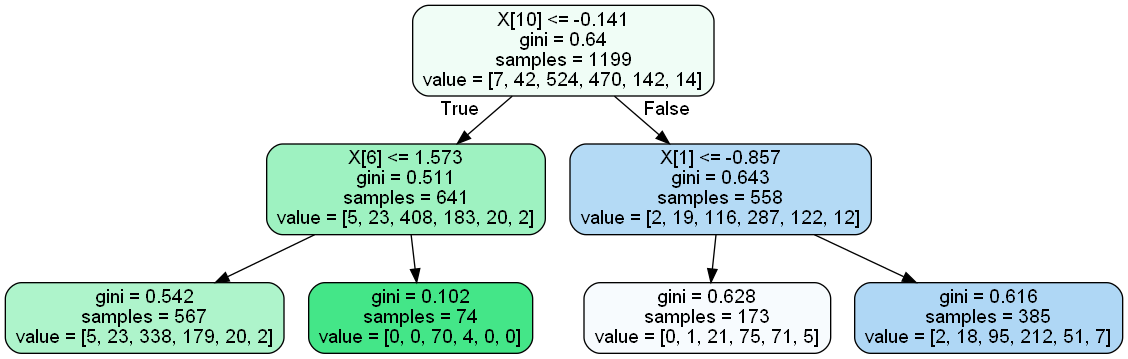

In [158]:
feature_name=list(X.columns)
class_name = list(y_train.unique())
# create a dot_file which stores the tree structure
dot_data = export_graphviz(clf,rounded = True, filled = True)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('tree.png')
# show graph
Image(graph.create_png())

###  Hyperparameter  tunings doesn't  always improves the accuracy  but more than 90% it will increse the accuracy, but not 100%.

In [159]:
# it can be seen that gini criterion is used , maximum depth used is 3, min_samples_leaf used is 11 and min_sample_split used is 4.
# above these parameters are in the range which has been provided.
# different range gives different results.

In [160]:
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth =3, min_samples_leaf=11, min_samples_split = 4)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.5375

In [161]:
# from the result we can see that we can increase the accuracy by increasing the range.
# as the accuracy is increased from 50.5 % to 54 %.

In [162]:
# we are tuning three hyperparameters right now, we are passing the different values for both parameters
grid_param = {
    'criterion': ['gini','entropy'],
    'max_depth' : range(5,20,4),
    'min_samples_leaf' : range(5,20,4),
    'min_samples_split': range(6,30,4)
}


# for large dataset we have to increase the range also.

In [163]:
grid_search = GridSearchCV(estimator=clf,
                          param_grid=grid_param,
                          cv=5,
                          n_jobs =-1)

# cv=5   five times cross validation and try to find the best combination.
# n_jobs=-1   it will engage  all the cores of the system to find the grid params so that it will decrese the time


In [164]:
grid_search.fit(X_train,y_train)

# to pass the training data.

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=3,
                                              min_samples_leaf=11,
                                              min_samples_split=4),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(5, 20, 4),
                         'min_samples_leaf': range(5, 20, 4),
                         'min_samples_split': range(6, 30, 4)})

In [165]:
# to find the best parameters

best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 13, 'min_samples_leaf': 17, 'min_samples_split': 14}


###  Hyperparameter  tunings doesn't  always improves the accuracy  but more than 90% it will increse the accuracy, but not 100%.

In [166]:
# it can be seen that gini criterion is used , maximum depth used is 3, min_samples_leaf used is 11 and min_sample_split used is 4.
# above these parameters are in the range which has been provided.
# different range gives different results.

In [167]:
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth =9, min_samples_leaf=17, min_samples_split = 4)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.595

In [168]:
# we can see that we can't increase the result by hyperparameter tuning.

In [169]:
y_pred = clf.predict(X_test)

In [170]:
accuracy_score(y_test,y_test)

1.0

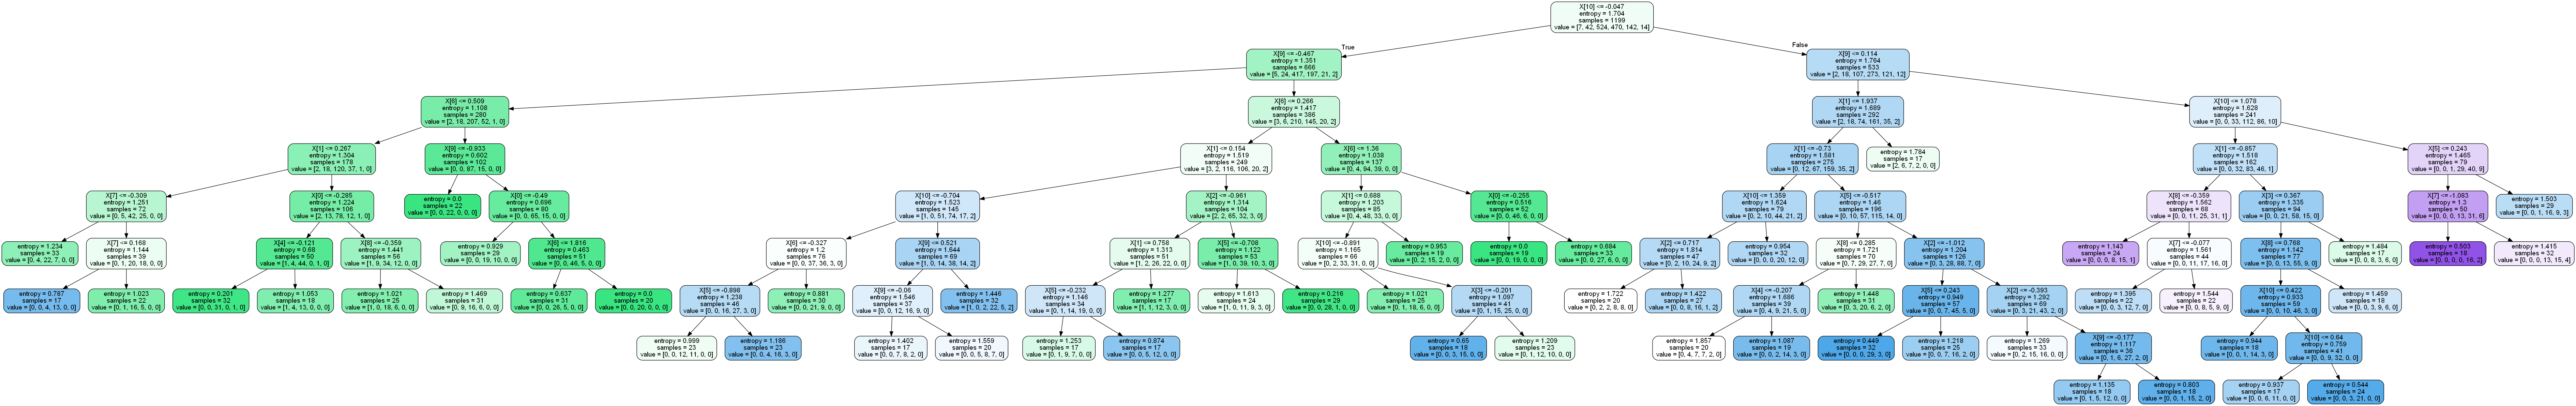

In [171]:
feature_name=list(X.columns)
class_name = list(y_train.unique())
# create a dot_file which stores the tree structure
dot_data = export_graphviz(clf,rounded = True, filled = True)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('tree.png')
# show graph
Image(graph.create_png())

In [172]:
sc = StandardScaler()

In [173]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [174]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [175]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        11
           5       0.69      0.84      0.76       157
           6       0.68      0.68      0.68       168
           7       0.73      0.47      0.57        57
           8       1.00      0.25      0.40         4

    accuracy                           0.69       400
   macro avg       0.52      0.37      0.40       400
weighted avg       0.67      0.69      0.67       400



In [176]:
# random forest gives accuracy of 60%

In [177]:
print(confusion_matrix(y_test, pred_rfc))

[[  0   0   3   0   0   0]
 [  0   0   7   4   0   0]
 [  0   1 132  23   1   0]
 [  0   0  45 115   8   0]
 [  0   0   4  26  27   0]
 [  0   0   0   2   1   1]]


In [178]:
from sklearn.linear_model import SGDClassifier


sgd = SGDClassifier(penalty=None)
sgd.fit(X_train, y_train)
pred_sgd = sgd.predict(X_test)

In [179]:
print(classification_report(y_test, pred_sgd))


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        11
           5       0.49      0.83      0.62       157
           6       0.41      0.29      0.34       168
           7       0.11      0.02      0.03        57
           8       0.14      0.25      0.18         4

    accuracy                           0.46       400
   macro avg       0.19      0.23      0.20       400
weighted avg       0.38      0.46      0.39       400



In [181]:
from sklearn.svm import SVC 
svc = SVC()
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)

In [182]:
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        11
           5       0.61      0.82      0.70       157
           6       0.59      0.58      0.59       168
           7       0.82      0.32      0.46        57
           8       0.00      0.00      0.00         4

    accuracy                           0.61       400
   macro avg       0.34      0.29      0.29       400
weighted avg       0.60      0.61      0.58       400



In [183]:
#Finding best parameters for our SVC model
param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=10)

In [184]:
grid_svc.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [185]:
#Best parameters for our svc model
grid_svc.best_params_

{'C': 1, 'gamma': 0.8, 'kernel': 'rbf'}

In [186]:
#Let's run our SVC again with the best parameters.
svc2 = SVC(C = 1.2, gamma =  0.9, kernel= 'rbf')
svc2.fit(X_train, y_train)
pred_svc2 = svc2.predict(X_test)
print(classification_report(y_test, pred_svc2))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        11
           5       0.63      0.87      0.73       157
           6       0.67      0.61      0.64       168
           7       0.86      0.44      0.58        57
           8       0.00      0.00      0.00         4

    accuracy                           0.66       400
   macro avg       0.36      0.32      0.32       400
weighted avg       0.65      0.66      0.64       400



In [187]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score

In [188]:
#Now lets try to do some evaluation for random forest model using cross validation.
rfc_eval = cross_val_score(estimator = rfc, X = X_train, y = y_train, cv = 10)
rfc_eval.mean()

0.679796918767507

### Conclusion

* wine quality is a irrational measure.
* It can be seen from the analysis that various factors affects the quality of wine.
* It can be seen that from using various models Random Forest Classifier gives best reult for wine quality.